<a href="https://colab.research.google.com/github/nicolassalomon96/Traffic_sign_classifier/blob/main/Scripts/Traffic_sign_classifier_(Feature_Maps).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificador de Señales de Tránsito empleando redes nueronales convolucionales

Nombre y Apellido: Nicolás Salomón

Email: nicolassalomon96@gmail.com

En el presente notebook se realizará una muestra sobre los mapas de características generados en base al modelo elegido para el clasificador. En el mismo se verán los resultados intermedios de las capas internas de la red neuronal.

#1. Librerias

In [ ]:
import os
from random import randint
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.applications.resnet import ResNet50
import imageio as io

##1.1. Acceso a Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#2. Importar el modelo

In [ ]:
#Creamos el modelo de la CNN_custom, con un modelo preentrenado
CNN_custom = keras.models.load_model('/content/drive/MyDrive/Posgrado/traffic_sign_detection/traffic_sign_classifier/Models/CNN_custom_leakyrelu_adam.h5')
print("Modelo creado")

Modelo creado


#3. Lectura de imagen de prueba y muestra de resultados

In [ ]:
#Función para leer el archivo .csv con las clases de señales
def load_class_names(path_directory):
    path_class_names =  os.path.join(path_directory,"class_names.csv")
    class_names = open(path_class_names).read().strip().split("\n")[1:]
    class_names = [l.split(',')[1] for l in class_names] #creo una lista con los nombres de cada label
    return class_names

#Función para leer las imágenes de prueba
def load_test_images(path_test):
    test_images = []
    files = os.listdir(path_test)
    for image_name in files: 
        image_path = os.path.join(path_test, image_name) #crea el path completo de la imagen
        image = io.imread(image_path)
        if image.shape[0] != 64 or image.shape[1] != 64:
          image = cv2.resize(image,(64,64))
        if image.shape[2] == 4:
          image = image[:,:,:3]

        #Actualizo la lista de imagenes
        test_images.append(image)
    
    return test_images

In [ ]:
class_names_path = "/content/drive/MyDrive/Posgrado/traffic_sign_detection/traffic_sign_classifier/Dataset"
class_names = load_class_names(class_names_path)

path_test = '/content/drive/MyDrive/Posgrado/traffic_sign_detection/traffic_sign_classifier/custom_signs'
test_images = load_test_images(path_test)

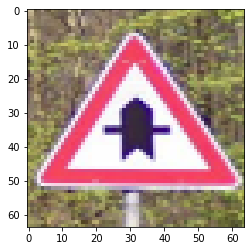

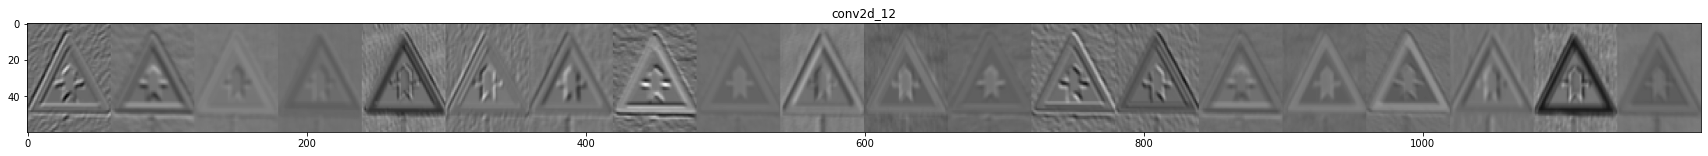

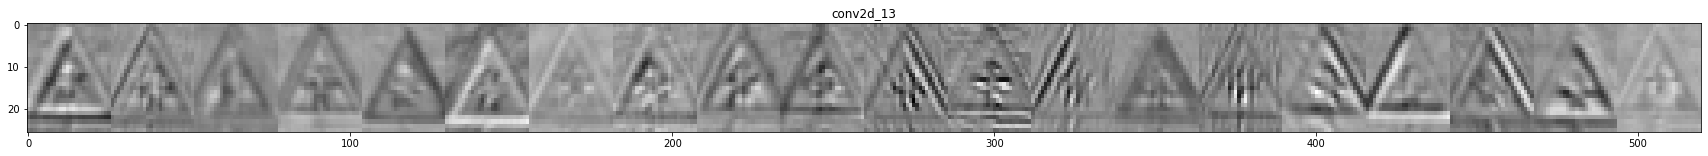

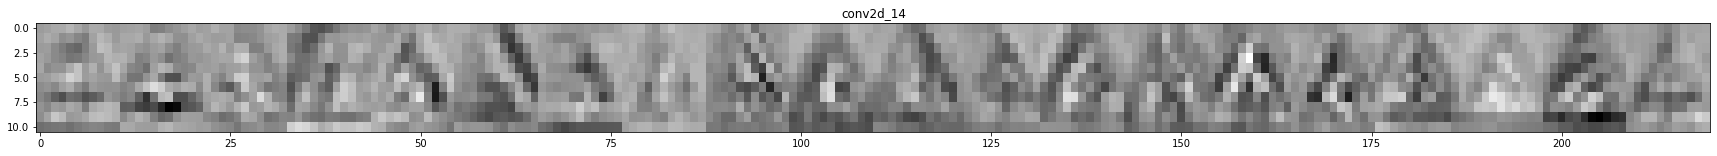

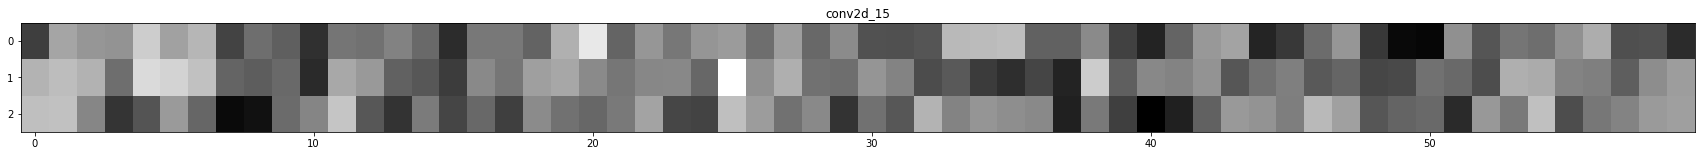

In [ ]:
#Función para mostrar los resultados de cada capa convolucional de una imagen dada.
def plot_features_map(model, img):
  # Se define un modelo que tomará una imagen de entrada y mostrará los resultados de las capas intermedias
  successive_outputs = [layer.output for layer in model.layers[1:]]
  n_features = 20 #Número de mapas de características a mostrar
  visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
  img = img.reshape((1,) + img.shape)# Array (1, 64, 64, 3)
  successive_feature_maps = visualization_model.predict(img)

  # Obtenemos los nombres de las capas para plotearlas luego
  layer_names = [layer.name for layer in model.layers]

  for layer_name, feature_map in zip(layer_names, successive_feature_maps):

    if len(feature_map.shape) == 4:

      size = feature_map.shape[1]  

      #Generamos una matriz vacia para ir colocando cada mapa de características
      display_grid = np.zeros((size, size * n_features))

      #Realizamos un pequeño postprocesamiento para observar mejor los mapas de características
      for i in range(n_features):
        x  = feature_map[0, :, :, i]
        display_grid[:, i * size : (i + 1) * size] = x

      # Mostramos los resultados
      if layer_name[0:4] == 'conv':
        scale = 20 / n_features
        plt.figure(figsize=(30,2))
        plt.title (layer_name )
        plt.grid  (False)
        plt.imshow(display_grid, aspect='auto', cmap='gray') 

image = 10
plt.imshow(test_images[image])
plot_features_map(CNN_custom, test_images[image])